In [11]:
caffe_root = '../caffe-crfrnn/'
import sys
sys.path.insert(0, caffe_root + 'python')

import os
import cPickle
import logging
import numpy as np
import pandas as pd
from PIL import Image as PILImage
#import Image
import cStringIO as StringIO
import caffe
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# set up net
MODEL_FILE = 'TVG_CRFRNN_COCO_VOC.prototxt'
PRETRAINED = 'TVG_CRFRNN_COCO_VOC.caffemodel'

net = caffe.Segmenter(MODEL_FILE, PRETRAINED)
net.set_mode_gpu()
net.set_device(0)

In [12]:
# load image
IMAGE_FILE = 'input.jpg'
input_image = 255 * caffe.io.load_image(IMAGE_FILE)

width = input_image.shape[0]
height = input_image.shape[1]
maxDim = max(width,height)

image = PILImage.fromarray(np.uint8(input_image))
image = np.array(image)

pallete = [0,0,0,
            128,0,0,
            0,128,0,
            128,128,0,
            0,0,128,
            128,0,128,
            0,128,128,
            128,128,128,
            64,0,0,
            192,0,0,
            64,128,0,
            192,128,0,
            64,0,128,
            192,0,128,
            64,128,128,
            192,128,128,
            0,64,0,
            128,64,0,
            0,192,0,
            128,192,0,
            0,64,128,
            128,64,128,
            0,192,128,
            128,192,128,
            64,64,0,
            192,64,0,
            64,192,0,
            192,192,0]

mean_vec = np.array([103.939, 116.779, 123.68], dtype=np.float32)
reshaped_mean_vec = mean_vec.reshape(1, 1, 3);

# Rearrange channels to form BGR
im = image[:,:,::-1]
# Subtract mean
im = im - reshaped_mean_vec

# Pad as necessary
cur_h, cur_w, cur_c = im.shape
pad_h = 500 - cur_h
pad_w = 500 - cur_w
im = np.pad(im, pad_width=((0, pad_h), (0, pad_w), (0, 0)), mode = 'constant', constant_values = 0)

In [14]:
# Get predictions
segmentation = net.predict([im])
segmentation2 = segmentation[0:cur_h, 0:cur_w]
output_im = PILImage.fromarray(segmentation2)
output_im.putpalette(pallete)

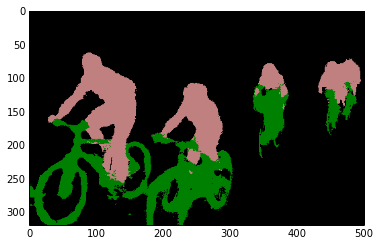

In [15]:
plt.imshow(output_im)
plt.savefig('output.png')